In [2]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [3]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [5]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [6]:
data_baseline = xr.open_mfdataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0/pH/ph_baseline_7.0_cropped.nc')

In [7]:
data_oae = xr.open_mfdataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0/pH/ph_OAE_7.0_cropped.nc')

In [8]:
data_baseline = data_baseline.ph[0,:]
data_oae = data_oae.ph[0,:]

In [9]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [10]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [11]:
month_length_baseline = dataframe_base.time_counter.dt.days_in_month
ph_base = ((dataframe_base * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

In [12]:
month_length_oae = dataframe_oae.time_counter.dt.days_in_month
ph_oae = ((dataframe_oae * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

### Averaged Annual Amplitude of pH for the last ten years without OAE

In [13]:
ph_max_base = (ph_base.resample(time_counter='AS').max('time_counter')).to_dataset(name='ph')

In [14]:
ph_min_base = (ph_base.resample(time_counter='AS').min('time_counter')).to_dataset(name='ph')

In [15]:
ph_amplitude_base = (ph_max_base['ph'] - ph_min_base['ph']).to_dataset(name='ph')

In [16]:
ph_amplitude_base_map = (ph_amplitude_base.ph.mean(dim=('time_counter')).to_dataset(name='ph'))

Text(0.5, 1.06, 'pH seasonal cycle change without OAE')

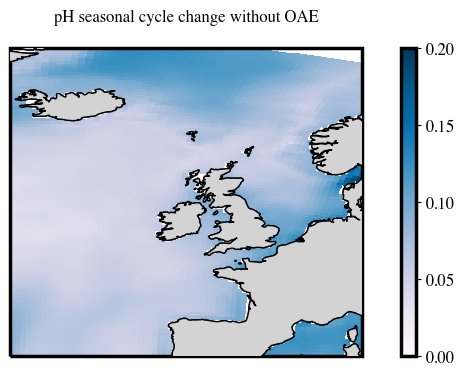

In [17]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=ph_amplitude_base_map.ph.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 0.2, cmap="PuBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('pH seasonal cycle change without OAE', fontname="Times", fontsize=12, y=1.06)

### Averaged Annual Amplitude of pH for the last ten years with OAE

In [18]:
ph_max_oae = (ph_oae.resample(time_counter='AS').max('time_counter')).to_dataset(name='ph')

In [19]:
ph_min_oae = (ph_oae.resample(time_counter='AS').min('time_counter')).to_dataset(name='ph')

In [20]:
ph_amplitude_oae = (ph_max_oae['ph'] - ph_min_oae['ph']).to_dataset(name='ph')

In [21]:
ph_amplitude_oae_map = (ph_amplitude_oae.ph.mean(dim=('time_counter'))).to_dataset(name='ph')

Text(0.5, 1.06, 'pH seasonal cycle change with OAE')

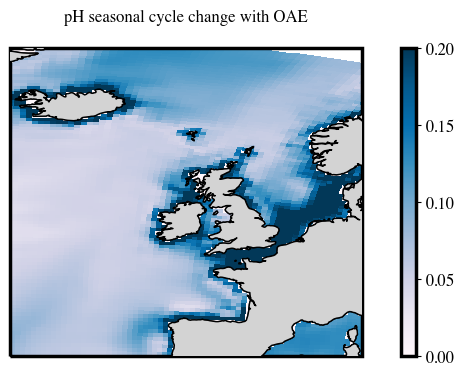

In [22]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=ph_amplitude_oae_map.ph.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 0.2, cmap="PuBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('pH seasonal cycle change with OAE', fontname="Times", fontsize=12, y=1.06)

### Δ pH between Baseline and OAE scenario

In [23]:
ph_amplitude_change = ph_amplitude_oae - ph_amplitude_base

In [24]:
ph_amplitude_change_map = (ph_amplitude_change.ph.mean(dim=('time_counter'))).to_dataset()

Text(0.5, 1.06, 'pH seasonal cycle change with OAE')

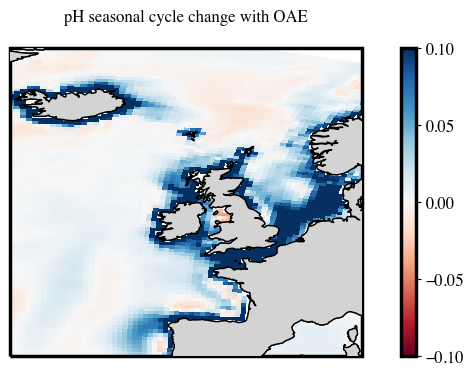

In [25]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=ph_amplitude_change_map.ph.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = -0.1, vmax = 0.1, cmap="RdBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('pH seasonal cycle change with OAE', fontname="Times", fontsize=12, y=1.06)

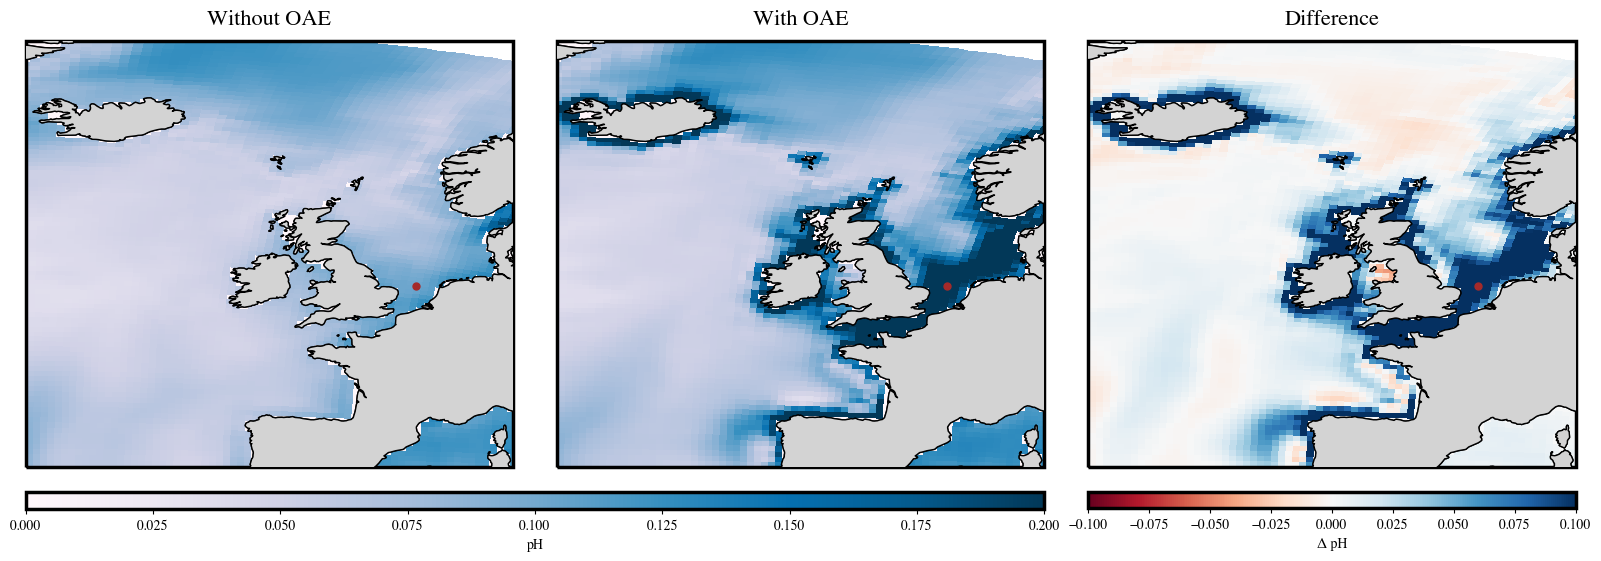

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
plt.subplots_adjust(wspace=0.09, hspace=0.05)

im1 = ph_amplitude_base_map.ph.plot.pcolormesh(
            ax=ax1, x="nav_lon", y="nav_lat",
            vmin=0,
            vmax=0.2,
            cmap="PuBu",
            add_colorbar=False
    )
    
im2 = ph_amplitude_oae_map.ph.plot.pcolormesh(
            ax=ax2, x="nav_lon", y="nav_lat",
            vmin=0,
            vmax=0.2,
            cmap="PuBu",
            add_colorbar=False
    )

im3 = ph_amplitude_change_map.ph.plot.pcolormesh( 
            ax=ax3, x="nav_lon", y="nav_lat",
            vmin=-0.1,
            vmax=0.1,
            cmap="RdBu", 
            add_colorbar=False
    )

axes = [ax1, ax2, ax3]

font_size = 10

for ax in axes:
    ax.coastlines()
    ax.set_extent([-25, 10, 40, 70])
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')
    ax.plot(3, 53, "o", color='brown', markersize=5)

for ax in axes: 
    if ax == ax1:
        ax.set_title("Without OAE", fontsize=16, y=1.02)
    elif ax == ax2:
        ax.set_title("With OAE", fontsize=16, y=1.02),
    else:
        ax.set_title("Difference", fontsize=16, y=1.02)    

cbar = plt.colorbar(im1, ax = [ax1, ax2], aspect=60, pad=0.04, location='bottom')
cbar.set_label('pH', fontsize=10)
cbar.ax.tick_params(labelsize=font_size)

cb3 = plt.colorbar(im3,ax=ax3, aspect=30, pad=0.04, location='bottom')
cb3.set_label('Δ pH', fontsize=10)
cb3.ax.yaxis.get_offset_text().set(size=10)
cb3.ax.tick_params(labelsize=font_size)

pass

#fig.suptitle('Seasonal Cycle Amplitude of pH (average over the last decade)', fontname='Times', fontsize=15, y=0.81)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/pH/figs/ph_seasonal_cycle.png')

### Amplitude at Location Point

In [27]:
ph_base_sliced = dataframe_base.where((3 < dataframe_base.nav_lon) & (dataframe_base.nav_lon < 3.1) & (52 < dataframe_base.nav_lat) & (dataframe_base.nav_lat < 53), drop=True)
ph_oae_sliced = dataframe_oae.where((3 < dataframe_oae.nav_lon) & (dataframe_oae.nav_lon < 3.1) & (52 < dataframe_oae.nav_lat) & (dataframe_oae.nav_lat < 53), drop=True)

In [28]:
ph_max_base_slc = (ph_base_sliced.resample(time_counter='AS').max('time_counter')).to_dataset(name='ph')

In [29]:
ph_min_base_slc = (ph_base_sliced.resample(time_counter='AS').min('time_counter')).to_dataset(name='ph')

In [30]:
ph_amplitude_base_slc = (ph_max_base_slc['ph'] - ph_min_base_slc['ph']).to_dataset(name='ph')

In [31]:
ph_max_base_slc = ph_max_base_slc.ph.mean(dim=('time_counter'))
ph_min_base_slc = ph_min_base_slc.ph.mean(dim=('time_counter'))
ph_amplitude_base_slc = ph_amplitude_base_slc.ph.mean(dim=('time_counter'))

In [32]:
ph_max_oae_slc = (ph_oae_sliced.resample(time_counter='AS').max('time_counter')).to_dataset(name='ph')

In [33]:
ph_min_oae_slc = (ph_oae_sliced.resample(time_counter='AS').min('time_counter')).to_dataset(name='ph')

In [34]:
ph_amplitude_oae_slc = (ph_max_oae_slc['ph'] - ph_min_oae_slc['ph']).to_dataset(name='ph')

In [35]:
ph_max_oae_slc = ph_max_oae_slc.ph.mean(dim=('time_counter'))
ph_min_oae_slc = ph_min_oae_slc.ph.mean(dim=('time_counter'))
ph_amplitude_oae_slc = ph_amplitude_oae_slc.ph.mean(dim=('time_counter'))

In [36]:
ph_max_oae_slc = ph_max_oae_slc.to_dataframe()
ph_min_oae_slc = ph_min_oae_slc.to_dataframe()

### Map of EU Seasonal Average of pH without OAE

In [40]:
dataframe_base = dataframe_base.to_dataset(name='ph')

In [41]:
month_length_baseline = dataframe_base.time_counter.dt.days_in_month 
weights_baseline = (month_length_baseline.groupby("time_counter.season") / month_length_baseline.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_baseline.groupby('time_counter.season').sum().values, np.ones(4))

In [42]:
weights_baseline = weights_baseline.to_dataset()

In [43]:
ds_weighted_baseline = (dataframe_base.ph * weights_baseline.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='ph')
ds_unweighted_baseline = dataframe_base.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

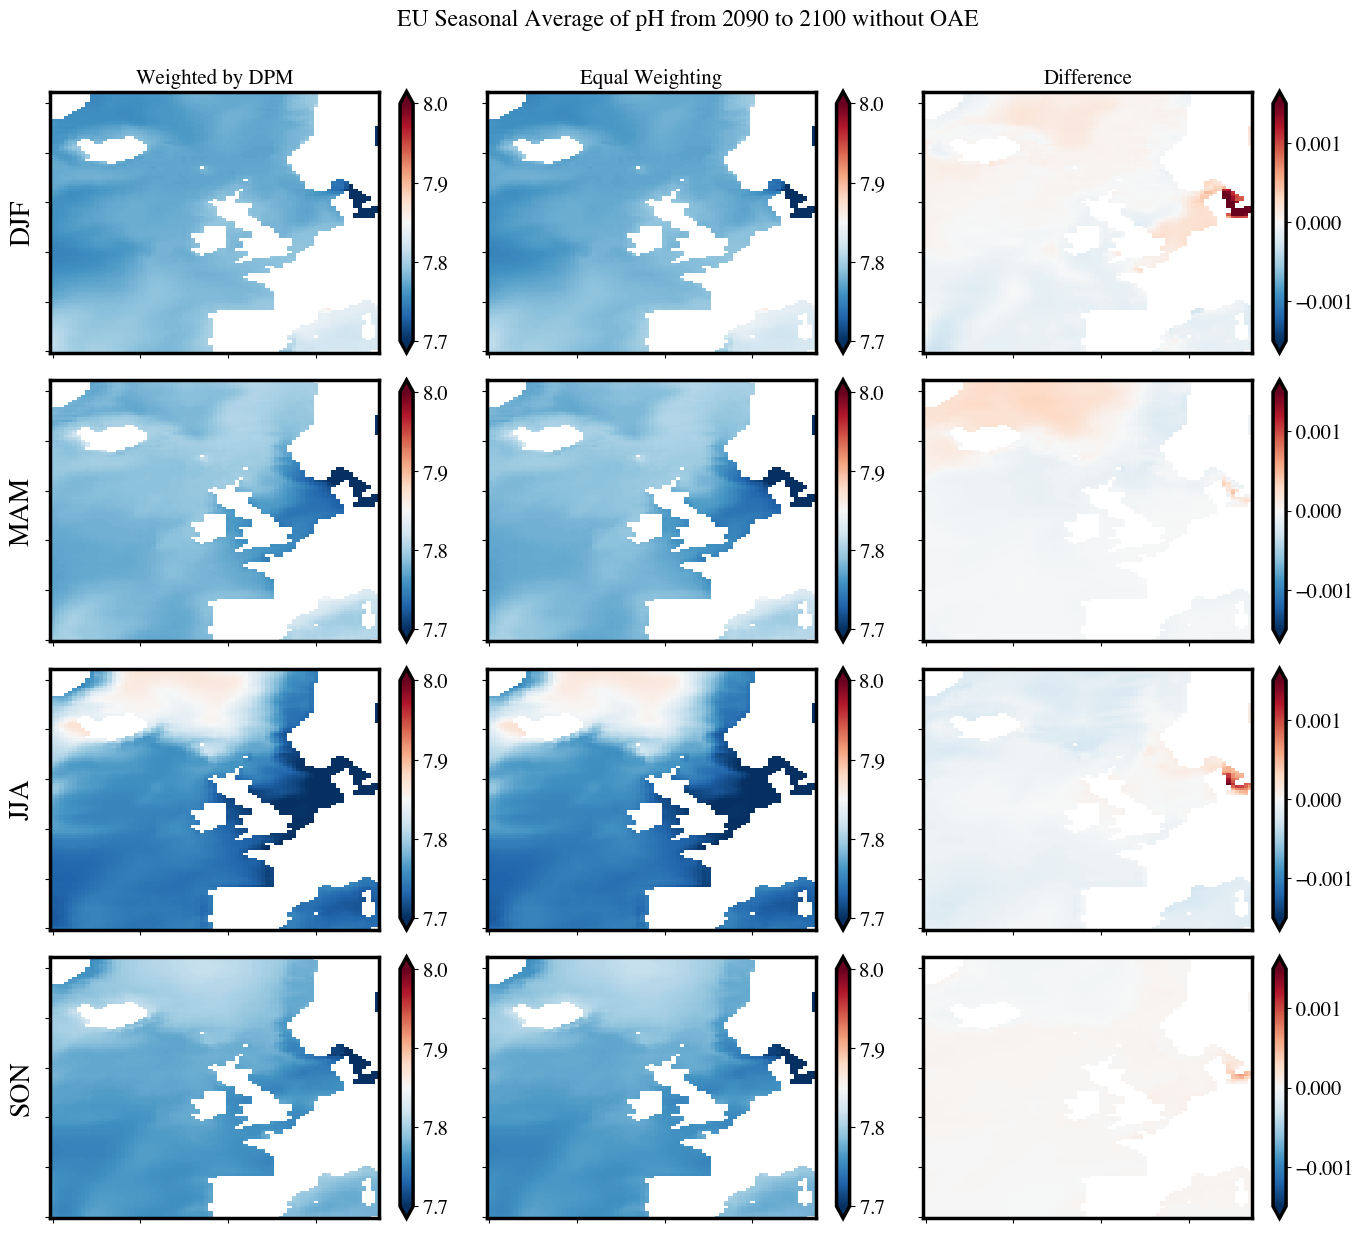

In [56]:
notnull = pd.notnull(ds_unweighted_baseline["ph"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=7.7,
        vmax=8,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=7.7,
        vmax=8,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.0015,
        vmax=0.0015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of pH from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### Map of EU Seasonal Average of pH with OAE

In [50]:
dataframe_oae = dataframe_oae.to_dataset(name='ph')

In [51]:
month_length_oae = dataframe_oae.time_counter.dt.days_in_month 
weights_oae = (month_length_oae.groupby("time_counter.season") / month_length_oae.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_oae.groupby('time_counter.season').sum().values, np.ones(4))

In [52]:
weights_oae = weights_oae.to_dataset()

In [53]:
ds_weighted_oae = (dataframe_oae.ph * weights_oae.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_oae = ds_weighted_oae.to_dataset(name='ph')
ds_unweighted_oae = dataframe_oae.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

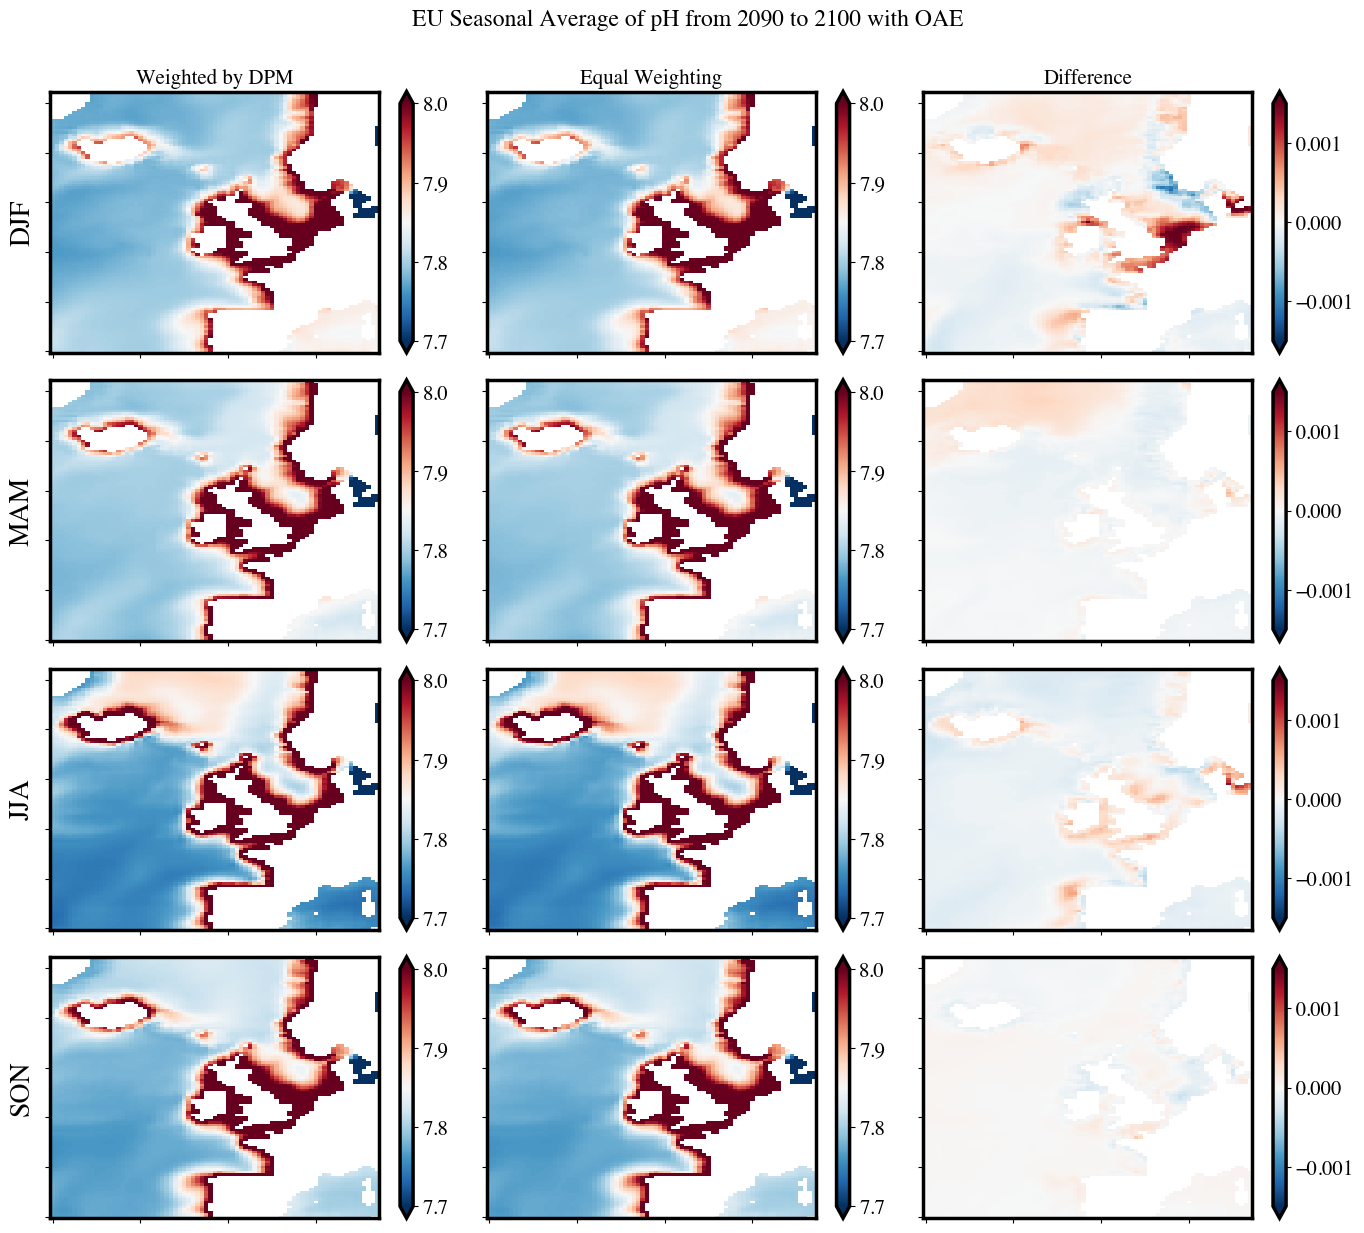

In [55]:
notnull = pd.notnull(ds_unweighted_oae["ph"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=7.7,
        vmax=8,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=7.7,
        vmax=8,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.0015,
        vmax=0.0015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of pH from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass